In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [2]:
#Read Dataset
df = pd.read_csv('dataset_revisi.csv',sep=';')
df.head()

,Question,Class
0,Berapa harga buku?,Book Price
1,Harga buku kena berapa?,Book Price
2,Buku dijual berapa?,Book Price
3,Bukunya berapa?,Book Price
4,Berapa bukunya?,Book Price


In [3]:
#split Feature and class
features = df['Question'].values
label = df['Class'].values
print(features)

['Berapa harga buku?' ' Harga buku kena berapa?' 'Buku dijual berapa?'
 'Bukunya berapa?' 'Berapa bukunya?' 'Harga buku berapa?'
 'Buku harganya berapa?' 'Kalau harga buku berapa ya?'
 'Saya mau beli buku, kira kira harganya berapa ya?'
 'Saya mau beli buku ini' 'Buku ini harganya berapa?'
 'Harga buku ini berapa?' 'Bagaimana saya bisa membeli barang ini? '
 'Cara beli barang bagaimana?' 'Cara membeli barang bagaimana?'
 'Pembayaran apa saja yang diterima disini?'
 'bagaimana cara membeli barang tersebut?'
 'Bagaimana cara beli barang disini?'
 'Transaksinya boleh pakai e-money gak?'
 'Transaksinya boleh menggunakan m-banking?'
 'Saya mau transaksi COD bisa gak ?' 'Pembayarannya bisa lewat BCA gak?'
 'Toko ini terima pembayaran Mandiri tidak?'
 'Bayarnya bisa pakai kartu debet gak?' 'Disini bisa bayar transfer gak?'
 'Apa saja yang dapat dilakukan bot ini?'
 'Fitur apa saja yang dimiliki bot ini ?'
 'Apa saja fitur yang dimiliki bot ini ?'
 'Ada fitur apa aja buat bot ini?' 'Ada fitur 

In [4]:
#Text Preprocessing data using Sastrawi
def stop_words(stop_word, df):
    data_list = []
    for i in df:
        data_list.append(stop_word.remove(i))
    return data_list
def stem_words(stem, df):
    data_list = []
    for i in df:
        data_list.append(stem.stem(i))
    return data_list
def preprocessing_words(features,stemmer,stop_word):
    features = stop_words(stop_word, features)
    features = stem_words(stemmer, features)
    return features
stop_word = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

features = preprocessing_words(features, stemmer, stop_word)
print(features)

['berapa harga buku', 'harga buku kena berapa', 'buku jual berapa', 'buku berapa', 'berapa buku', 'harga buku berapa', 'buku harga berapa', 'kalau harga buku berapa ya', 'saya mau beli buku kira kira harga berapa ya', 'saya mau beli buku', 'buku harga berapa', 'harga buku berapa', 'bagaimana bisa beli barang ini', 'cara beli barang bagaimana', 'cara beli barang bagaimana', 'bayar apa yang terima sini', 'bagaimana cara beli barang sebut', 'bagaimana cara beli barang sini', 'transaksi pakai e-money gak', 'transaksi guna m-banking', 'saya mau transaksi cod gak', 'bayar lewat bca gak', 'toko terima bayar mandiri tidak', 'bayar pakai kartu debet gak', 'sini bayar transfer gak', 'apa yang laku bot ini', 'fitur apa yang milik bot', 'apa fitur milik bot', 'ada fitur apa aja buat bot ini', 'ada fitur apa aja bot ini', 'bagaimana cara bot kerja', 'bagaimana bot bisa bantu saya', 'bot ngapain aja', 'apa bisa bot bantu', 'bot bisa apa saja', 'barang apa yang jual', 'jual apa saja', 'barang jual ap

In [5]:
#encode class using LabelEncoder
encoder = LabelEncoder().fit(label)
label_encoded = encoder.transform(label).reshape(-1,1)

In [6]:
#split data with split ratio 8:2
X_train , X_test , y_train , y_test = train_test_split(features, label_encoded,test_size=0.2, shuffle=True,random_state = None)

In [7]:
#TEXT VECTORIZER. Convert Text into number
vectorizer = TfidfVectorizer().fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

[Text(266.445, 209.6742857142857, 'X[16] <= 0.102\nentropy = 3.395\nsamples = 84\nvalue = [10, 10, 7, 11, 3, 5, 4, 1, 5, 6, 11, 11]'),
 Text(220.41, 194.14285714285714, 'X[3] <= 0.131\nentropy = 3.166\nsamples = 69\nvalue = [1, 10, 7, 11, 3, 5, 4, 1, 5, 0, 11, 11]'),
 Text(161.82, 178.61142857142858, 'X[59] <= 0.224\nentropy = 2.939\nsamples = 49\nvalue = [1, 9, 1, 0, 3, 5, 4, 1, 5, 0, 9, 11]'),
 Text(133.92000000000002, 163.07999999999998, 'X[63] <= 0.188\nentropy = 2.396\nsamples = 36\nvalue = [1, 9, 1, 0, 3, 1, 0, 0, 1, 0, 9, 11]'),
 Text(122.76, 147.54857142857142, 'X[40] <= 0.341\nentropy = 2.43\nsamples = 28\nvalue = [1, 9, 1, 0, 3, 1, 0, 0, 1, 0, 9, 3]'),
 Text(111.6, 132.01714285714286, 'X[52] <= 0.19\nentropy = 2.171\nsamples = 25\nvalue = [1, 9, 1, 0, 3, 1, 0, 0, 1, 0, 9, 0]'),
 Text(100.44, 116.48571428571428, 'X[23] <= 0.211\nentropy = 2.258\nsamples = 20\nvalue = [1, 9, 1, 0, 3, 1, 0, 0, 1, 0, 4, 0]'),
 Text(89.28, 100.9542857142857, 'X[15] <= 0.18\nentropy = 1.92\nsamples

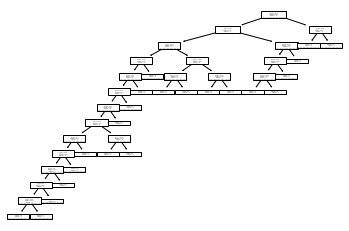

In [8]:
#Training using Decision Tree Classifier using ID3 from sklearn 
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model = tree_model.fit(X_train, y_train)
plot_tree(tree_model)

In [9]:
#DECISION TREE USING ID3 ALGORITHM ACCURACY
tree_model_prediction = tree_model.predict(X_test)
print('Accuracy using Decision Tree ID3: '+ str(round(accuracy_score(y_test, tree_model_prediction),2) * 100) + '%')

Accuracy using Decision Tree ID3: 90.0%


<AxesSubplot:>

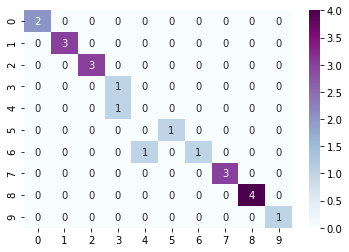

In [10]:

cnf = confusion_matrix(y_test, tree_model_prediction)
sns.heatmap(cnf, cmap='BuPu',annot=True)

In [11]:
#Training using Multinomial NB
model_naive_bayes = MultinomialNB()
model_naive_bayes = model_naive_bayes.fit(X_train,y_train)


C:\Users\Matthew\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#Check accuracy of MNB
model_naive_bayes_prediction = model_naive_bayes.predict(X_test)
print('Accuracy using Multinomial Naive Bayes: ' + str(round(accuracy_score(y_test, model_naive_bayes_prediction),2) * 100) + '%')

Accuracy using Multinomial Naive Bayes: 81.0%


<AxesSubplot:>

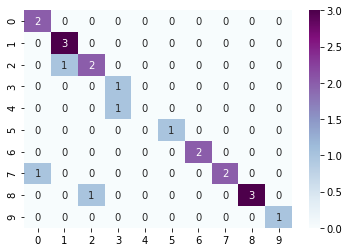

In [13]:

cnf = confusion_matrix(y_test, model_naive_bayes_prediction)

sns.heatmap(cnf, cmap='BuPu',annot=True)

In [14]:
#Implement Chatbot using best model
import random
def get_prediction(user_input):
    user_input = stop_word.remove(user_input)
    user_input = stemmer.stem(user_input)
    user_input = vectorizer.transform([user_input])
    prediction_res = tree_model.predict(user_input)
    prediction_res = encoder.inverse_transform(prediction_res)
    return answer_bot[[prediction_res[0]]].iloc[random.randint(0, answer_bot[[prediction_res[0]]].shape[0]) - 1]


answer_bot = pd.read_csv('answer.csv',sep=';')
while True:
    print('User: ',sep='')
    user_input = str(input())
    if(user_input == 'exit' or user_input =='-e') :
        break
    predict = get_prediction(user_input)
    
    print('Bot: ' + str(predict[0]))

User: 
